<a href="https://colab.research.google.com/github/LucasVCorrea/Data-Science/blob/main/argentina_poverty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [27]:
dataFrame = pd.read_csv("/content/argentina.csv")

In [29]:
dataFrame.head()

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605


In [30]:
dataFrame.poverty.max()

17.035583210850106

In [72]:
dataFrame.loc[dataFrame['poverty'] >= dataFrame['poverty'].max()]  # Prov mas pobre

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,max_povery
7,Formosa,3.807057e+06,4.61064,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.00344,True


In [77]:
dataFrame.loc[dataFrame['poverty'] <= dataFrame['poverty'].min()]  # Prov menos pobre

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,max_povery
9,La Pampa,6.990262e+06,1.5393,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415,False


In [78]:
indice_menos_pobre = dataFrame.loc[dataFrame['poverty'] <= dataFrame['poverty'].min()].index[0]

In [80]:
indice_mas_pobre = dataFrame.loc[dataFrame['poverty'] >= dataFrame['poverty'].max()].index[0]

In [81]:
dataFrame.loc[dataFrame['deficient_infra'] >= dataFrame['deficient_infra'].max()]   # Prov con peor infraestructura

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,max_povery
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605,False


In [82]:
dataFrame.loc[dataFrame['school_dropout'] >= dataFrame['school_dropout'].max()]   # Prov con más dropouts de la escuela

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,max_povery
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495,False


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

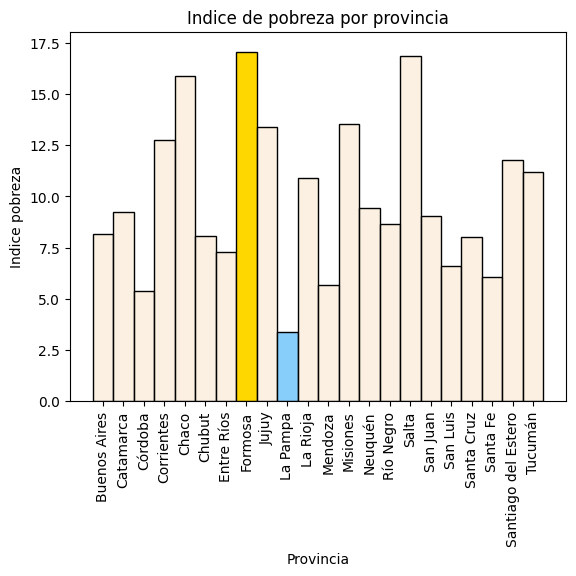

In [128]:
ax = sns.histplot(data = dataFrame, x="province",weights="poverty", binwidth=4,color='antiquewhite', edgecolor='black')
ax.set_xlabel("Provincia")
ax.set_ylabel("Indice pobreza")
ax.set_title("Indice de pobreza por provincia")
plt.xticks(rotation=90)
plt.ylim(0, dataFrame['poverty'].max() + 1)
ax.patches[indice_mas_pobre].set_facecolor('gold')
ax.patches[indice_menos_pobre].set_facecolor('lightskyblue')